In [0]:
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN
import pandas as pd 
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import cm
from sklearn.utils import shuffle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# from google.colab import files
# # UPLOAD YOUR DATASET FILE HERE
# uploaded = files.upload()


In [0]:
# Loading the dataset
path = '/content/dataset.csv'
data = pd.read_csv(path)
print(data.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   32    1   1      95.0   NaN  NaN  ...    0.0      0.7    1.0 NaN   NaN       1
1   34    1   4     115.0   NaN  NaN  ...    0.0      0.2    1.0 NaN   NaN       1
2   35    1   4       NaN   NaN  NaN  ...    1.0      NaN    NaN NaN   7.0       3
3   36    1   4     110.0   NaN  NaN  ...    1.0      1.0    2.0 NaN   6.0       1
4   38    0   4     105.0   NaN  NaN  ...    0.0      2.8    1.0 NaN   NaN       2

[5 rows x 14 columns]


In [0]:
# print the shape
print('The shape of the dataset : ', data.shape)

The shape of the dataset :  (920, 14)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05d4e55470>,
      dtype=object)

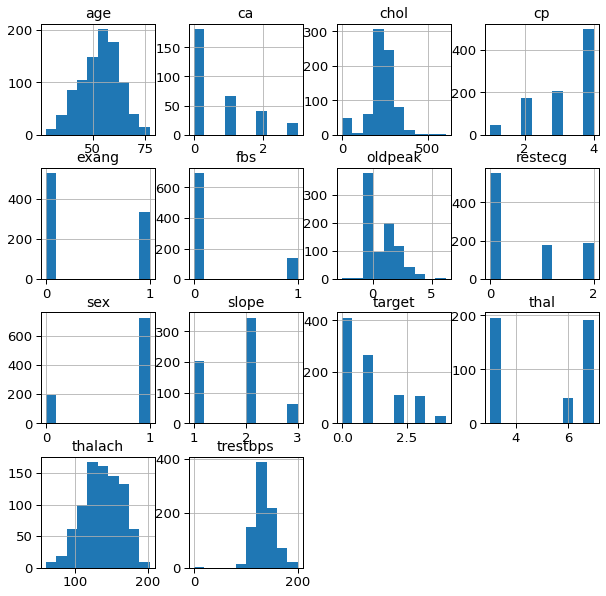

In [0]:
sns.set_context("paper", font_scale = 1.5, rc = {"font.size": 5,"axes.titlesize": 14,"axes.labelsize": 15}) 
data.hist(figsize = (10, 10))


In [0]:
# Null value count
data.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol        153
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

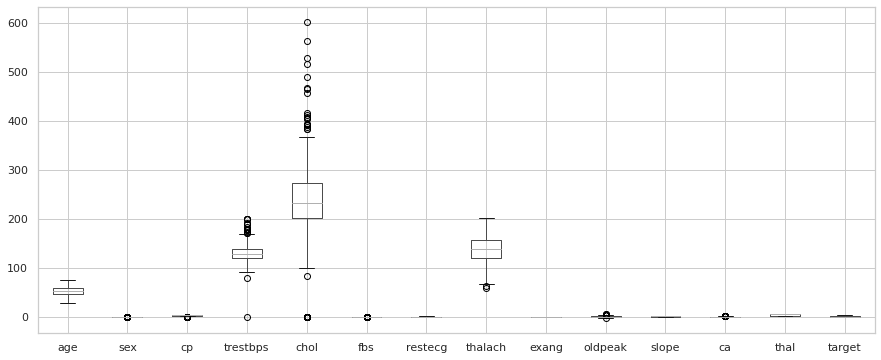

In [0]:
#Outlier visualization on raw dataset
sns.set(style = "whitegrid")
data.boxplot(figsize = (15,6))

### Summary of the dataset

In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  861 non-null    float64
 4   chol      767 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 100.8 KB
None


### Statistical properties of dataset

In [0]:
print(data.describe())

              age         sex          cp  ...          ca        thal      target
count  920.000000  920.000000  920.000000  ...  309.000000  434.000000  920.000000
mean    53.510870    0.789130    3.250000  ...    0.676375    5.087558    0.995652
std      9.424685    0.408148    0.930969  ...    0.935653    1.919075    1.142693
min     28.000000    0.000000    1.000000  ...    0.000000    3.000000    0.000000
25%     47.000000    1.000000    3.000000  ...    0.000000    3.000000    0.000000
50%     54.000000    1.000000    4.000000  ...    0.000000    6.000000    1.000000
75%     60.000000    1.000000    4.000000  ...    1.000000    7.000000    2.000000
max     77.000000    1.000000    4.000000  ...    3.000000    7.000000    4.000000

[8 rows x 14 columns]


### Removing the null values

In [0]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [0]:
# Data Imputation
data_final = data.copy(deep = True)

mean_cols = [['oldpeak', 'chol']]
median_cols = [['trestbps','thalach']]

# Replace with mean
for column in mean_cols:
  mean = data_final[column].mean(skipna=True)
  data_final[column] = data_final[column].replace(np.NaN, mean)

# Replace with median
for column in median_cols:
  med = data_final[column].median(skipna=True)
  data_final[column] = data_final[column].replace(np.NaN, med)


In [0]:
# Replace with mode
mode_cols = [['fbs','restecg', 'exang', 'slope', 'ca', 'thal' ]]

for column in mode_cols:
  mode = data_final[column].mode()
  # print(mode, type(mode))
mode_dict = mode.to_dict().values()
modeval = []
for i in mode_dict:
  modeval.append(i[0])
  
for col in range(0,len(mode_cols[0])):
  # print(mode_cols[0][col])
  # print(modeval[col])
  data_final[mode_cols[0][col]] = data_final[mode_cols[0][col]].replace(np.NaN,modeval[col])
data_final.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
data = data_final

In [0]:
# changing the datatype to float
def replace_nulls(data):
    print("Unique Values: ")
    for col in data.columns:
        data[col] = data[col].astype(str)
        l = []
        data[col] = data[col].astype(float)
        print("FOR ATTR: ", col,data[col].unique())
    print("Replaced null values with mean of the feature value...")
    return data

In [0]:
data = replace_nulls(data)

Unique Values: 
FOR ATTR:  age [32. 34. 35. 36. 38. 40. 41. 42. 43. 45. 46. 47. 48. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 72. 73.
 74. 28. 29. 30. 31. 33. 37. 39. 44. 49. 71. 77. 76. 75.]
FOR ATTR:  sex [1. 0.]
FOR ATTR:  cp [1. 4. 3. 2.]
FOR ATTR:  trestbps [ 95. 115. 130. 110. 105. 100. 135. 150. 125. 145. 140. 155. 160. 120.
 165.  80. 180. 170. 200. 185.  98. 112. 190. 142. 132. 108. 124. 113.
 122.  92. 118. 106. 138. 136. 128. 172. 117. 104. 134.  94. 102. 152.
 101. 126. 174. 148. 178. 158. 192. 129. 144. 123. 146. 156. 154. 114.
 164. 116.   0.  96. 127.]
FOR ATTR:  chol [231.06388527 132.         243.         237.         219.
 198.         225.         254.         298.         161.
 214.         220.         160.         167.         308.
 264.         166.         340.         209.         260.
 211.         173.         283.         194.         223.
 315.         275.         297.         292.         182.
 200.         204. 

In [0]:
def plotFreqDist(data):
  f, ax = plt.subplots(figsize=(5, 5))
  ax = sns.countplot(x="target", data=data)
  plt.title('Frequency distribution of Target variable')
  plt.show()

In [0]:
def binary_target(data):
    target = data['target'].replace([1,2,3,4],1)
    print("Number of samples with classes: ")
    print(target.value_counts())
    data['target'] = target    
    plotFreqDist(data)
    return data, target

## Visualize frequency distribution of target variable after preprocessing


---


**Interpretation**

The above plot confirms the findings that:
*   There are 509 patients suffering from heart disease
*   There are 411 patients who do not have any heart disease





Number of samples with classes: 
1.0    509
0.0    411
Name: target, dtype: int64


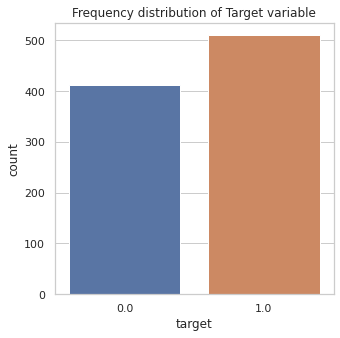

In [0]:
data, target = binary_target(data)

In [0]:
def print_correlation(data):
    corr = data.corr()
    print("\nPrinting the correlation matrix...")
    plt.figure(figsize=(10,10))
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdYlGn", annot = True, fmt='.1g')


Printing the correlation matrix...


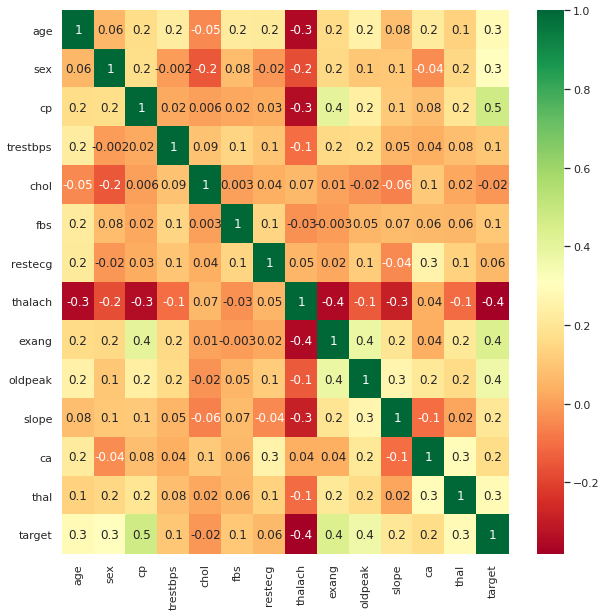

In [0]:
print_correlation(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05d2ce3400>,
      dtype=object)

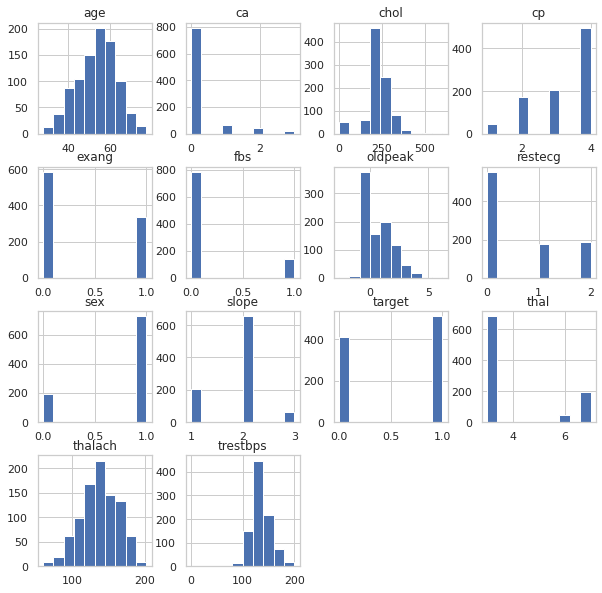

In [0]:
data.hist(figsize = (10, 10))

In [0]:
data.groupby('sex')['target'].value_counts()

sex  target
0.0  0.0       144
     1.0        50
1.0  1.0       459
     0.0       267
Name: target, dtype: int64

## target vs sex

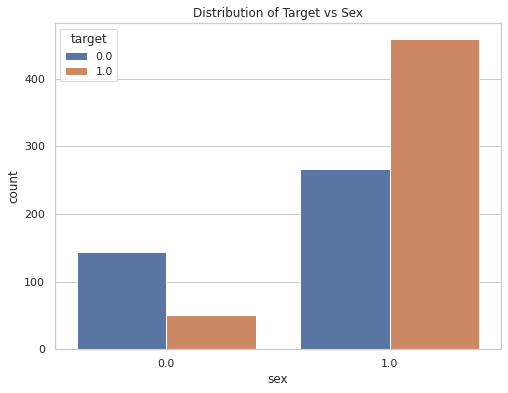

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=data)
plt.title('Distribution of Target vs Sex')
plt.show()



## target vs age

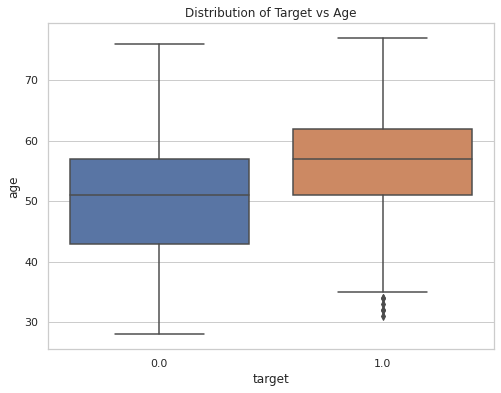

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=data)
plt.title('Distribution of Target vs Age')
plt.show()

## distribution of target vs age 

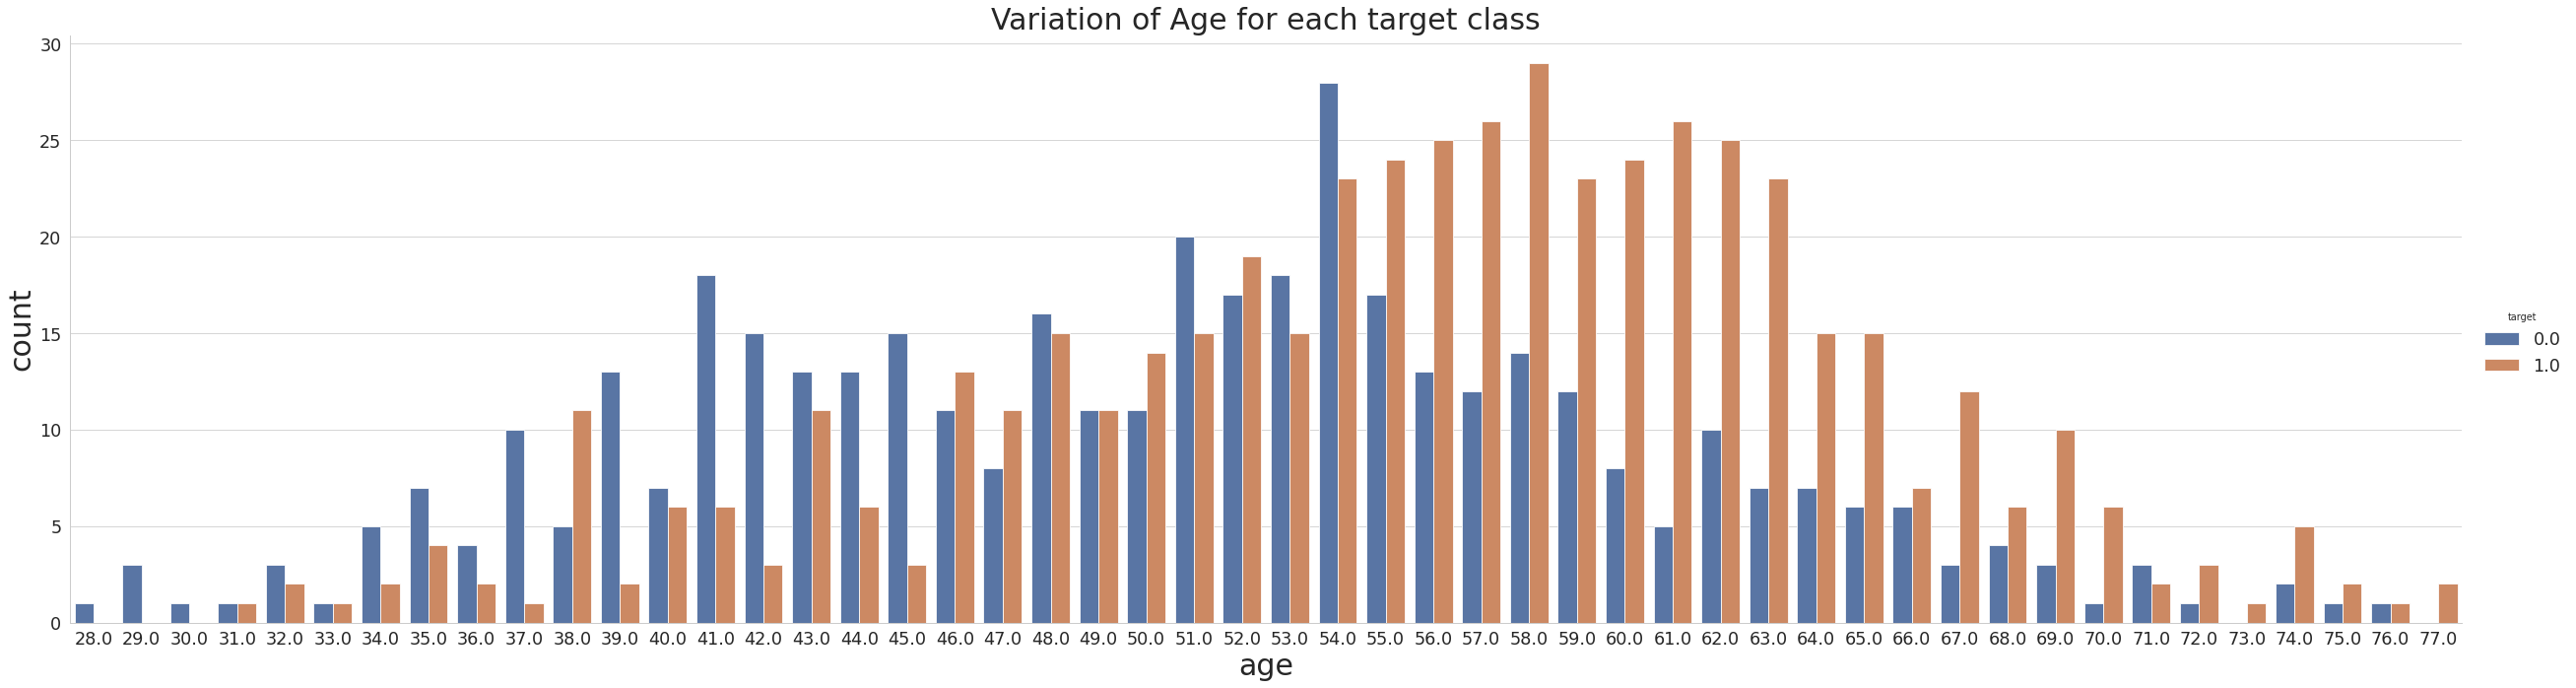

In [0]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 30,"axes.titlesize": 30,"axes.labelsize": 30}) 
sns.catplot(height = 10, aspect = 3.5, kind = 'count', data = data, x = 'age', hue = 'target', order = data['age'].sort_values().unique())

plt.title('Variation of Age for each target class')
plt.show()

## barplot of age vs sex

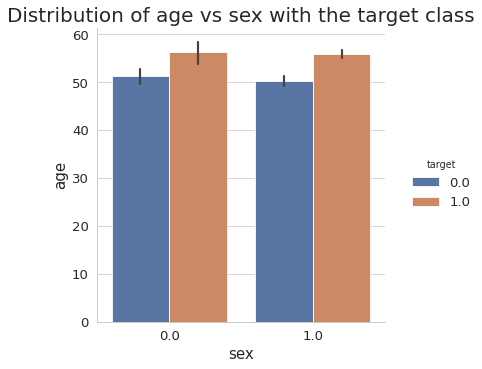

In [0]:
# barplot of age vs sex with hue = target
sns.set_context("paper", font_scale = 1.5, rc = {"font.size": 12,"axes.titlesize": 20,"axes.labelsize": 15}) 
sns.catplot(kind = 'bar', data = data, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

## balancing the dataset

In [0]:
def balance_dataset(data, target):
    data = data.drop(columns = ['target'])
    print("Before Dataset Balancing...")
    print(data.shape, target.shape)
    # print(data, target)
    sm = SMOTE(random_state=42)
    x_smote, y_smote = sm.fit_resample(data, target)
    print("After Dataset Balancing...")
    print(x_smote.shape, y_smote.shape)
    print("Number of samples with classes: ")
    print(len(y_smote))
    return x_smote, y_smote   

In [0]:
# x_smote, y_smote = balance_dataset(dfc, target)

In [0]:
df1 = data[data['target'] == 1]
print (df1)
df1 = df1.reset_index()
df2 = data[data['target'] == 0]
print (df2)

      age  sex   cp  trestbps        chol  ...   oldpeak  slope   ca  thal  target
0    32.0  1.0  1.0      95.0  231.063885  ...  0.700000    1.0  0.0   3.0     1.0
1    34.0  1.0  4.0     115.0  231.063885  ...  0.200000    1.0  0.0   3.0     1.0
2    35.0  1.0  4.0     130.0  231.063885  ...  0.878788    2.0  0.0   7.0     1.0
3    36.0  1.0  4.0     110.0  231.063885  ...  1.000000    2.0  0.0   6.0     1.0
4    38.0  0.0  4.0     105.0  231.063885  ...  2.800000    1.0  0.0   3.0     1.0
..    ...  ...  ...       ...         ...  ...       ...    ...  ...   ...     ...
913  62.0  1.0  4.0     158.0  170.000000  ...  0.000000    2.0  0.0   3.0     1.0
914  46.0  1.0  4.0     134.0  310.000000  ...  0.000000    2.0  0.0   3.0     1.0
915  54.0  0.0  4.0     127.0  333.000000  ...  0.000000    2.0  0.0   3.0     1.0
917  55.0  1.0  4.0     122.0  223.000000  ...  0.000000    2.0  0.0   6.0     1.0
919  62.0  1.0  2.0     120.0  254.000000  ...  0.000000    2.0  0.0   3.0     1.0

[50

In [0]:

def remove_outliers(x_smote):
    # y_smote = 
    clf = IsolationForest(random_state = 0)
    preds = clf.fit_predict(x_smote)
    # cmap = cm.get_cmap('Accent')
    # x_smote.plot.scatter(x = "chol",y = "trestbps",c = preds,cmap = cmap,colorbar = False,s=200)
    print("Number of outliers using Isolation Forest: ",list(preds).count(-1))
    # return preds
    return preds

In [0]:
labels = remove_outliers(df1)

Number of outliers using Isolation Forest:  120


In [0]:
rows_tar1 = []
for i in range(0,len(labels)):
  if labels[i] == -1:   #outliers
    rows_tar1.append(i)

df1_new = df1[~df1.index.isin(rows_tar1)]
print(df1_new)


     index   age  sex   cp  trestbps  ...   oldpeak  slope   ca  thal  target
1        1  34.0  1.0  4.0     115.0  ...  0.200000    1.0  0.0   3.0     1.0
2        2  35.0  1.0  4.0     130.0  ...  0.878788    2.0  0.0   7.0     1.0
3        3  36.0  1.0  4.0     110.0  ...  1.000000    2.0  0.0   6.0     1.0
6        7  38.0  1.0  3.0     115.0  ...  0.000000    2.0  0.0   7.0     1.0
7        8  38.0  1.0  4.0     135.0  ...  0.000000    2.0  0.0   3.0     1.0
..     ...   ...  ...  ...       ...  ...       ...    ...  ...   ...     ...
503    912  53.0  1.0  4.0     144.0  ...  1.500000    2.0  0.0   3.0     1.0
504    913  62.0  1.0  4.0     158.0  ...  0.000000    2.0  0.0   3.0     1.0
505    914  46.0  1.0  4.0     134.0  ...  0.000000    2.0  0.0   3.0     1.0
507    917  55.0  1.0  4.0     122.0  ...  0.000000    2.0  0.0   6.0     1.0
508    919  62.0  1.0  2.0     120.0  ...  0.000000    2.0  0.0   3.0     1.0

[389 rows x 15 columns]


In [0]:
df1_new = df1_new.drop(['index'], axis = 1)

In [0]:
labels = remove_outliers(df2)

Number of outliers using Isolation Forest:  83


In [0]:
rows_tar0 = []
for i in range(0,len(labels)):
  if labels[i] == -1:   #outliers
    rows_tar0.append(i)

df2_new = df2[~df2.index.isin(rows_tar0)]
print(df2_new)

      age  sex   cp  trestbps        chol  ...   oldpeak  slope   ca  thal  target
6    38.0  1.0  3.0     100.0  231.063885  ... -1.100000    1.0  0.0   3.0     0.0
17   45.0  1.0  3.0     110.0  231.063885  ... -0.100000    1.0  0.0   3.0     0.0
41   53.0  1.0  2.0     130.0  231.063885  ...  0.700000    3.0  0.0   3.0     0.0
47   53.0  1.0  4.0      80.0  231.063885  ...  2.000000    3.0  0.0   3.0     0.0
51   55.0  1.0  2.0     140.0  231.063885  ...  0.200000    1.0  0.0   3.0     0.0
..    ...  ...  ...       ...         ...  ...       ...    ...  ...   ...     ...
904  57.0  1.0  4.0     130.0  207.000000  ...  1.000000    2.0  0.0   3.0     0.0
909  68.0  1.0  3.0     134.0  254.000000  ...  0.000000    2.0  0.0   3.0     0.0
910  51.0  0.0  4.0     114.0  258.000000  ...  1.000000    1.0  0.0   3.0     0.0
916  62.0  1.0  1.0     130.0  139.000000  ...  0.878788    2.0  0.0   3.0     0.0
918  58.0  1.0  4.0     130.0  385.000000  ...  0.878788    2.0  0.0   3.0     0.0

[36

In [0]:
df_final = pd.concat([df1_new, df2_new], ignore_index=True)
df_final

age  sex   cp  trestbps        chol  ...   oldpeak  slope   ca  thal  target
0    34.0  1.0  4.0     115.0  231.063885  ...  0.200000    1.0  0.0   3.0     1.0
1    35.0  1.0  4.0     130.0  231.063885  ...  0.878788    2.0  0.0   7.0     1.0
2    36.0  1.0  4.0     110.0  231.063885  ...  1.000000    2.0  0.0   6.0     1.0
3    38.0  1.0  3.0     115.0  231.063885  ...  0.000000    2.0  0.0   7.0     1.0
4    38.0  1.0  4.0     135.0  231.063885  ...  0.000000    2.0  0.0   3.0     1.0
..    ...  ...  ...       ...         ...  ...       ...    ...  ...   ...     ...
746  57.0  1.0  4.0     130.0  207.000000  ...  1.000000    2.0  0.0   3.0     0.0
747  68.0  1.0  3.0     134.0  254.000000  ...  0.000000    2.0  0.0   3.0     0.0
748  51.0  0.0  4.0     114.0  258.000000  ...  1.000000    1.0  0.0   3.0     0.0
749  62.0  1.0  1.0     130.0  139.000000  ...  0.878788    2.0  0.0   3.0     0.0
750  58.0  1.0  4.0     130.0  385.000000  ...  0.878788    2.0  0.0   3.0     0.0

[751 rows x 14 columns]

In [0]:
df_final = df_final.sample(frac=1)

In [0]:
df_final

age  sex   cp  trestbps        chol  ...  oldpeak  slope   ca  thal  target
479  48.0  0.0  4.0     108.0  163.000000  ...      2.0    1.0  0.0   3.0     0.0
652  41.0  1.0  3.0     130.0  214.000000  ...      2.0    2.0  0.0   3.0     0.0
40   54.0  1.0  4.0     130.0  231.063885  ...      3.0    2.0  0.0   7.0     1.0
13   46.0  1.0  4.0     100.0  231.063885  ...     -2.6    2.0  0.0   3.0     1.0
6    40.0  1.0  4.0      95.0  231.063885  ...      0.0    1.0  0.0   3.0     1.0
..    ...  ...  ...       ...         ...  ...      ...    ...  ...   ...     ...
480  48.0  0.0  4.0     120.0  254.000000  ...      0.0    2.0  0.0   3.0     0.0
37   53.0  1.0  4.0     125.0  231.063885  ...      1.5    1.0  0.0   3.0     1.0
394  56.0  1.0  3.0     120.0  231.063885  ...      0.0    2.0  0.0   7.0     0.0
71   61.0  1.0  4.0     110.0  231.063885  ...      1.4    2.0  0.0   3.0     1.0
283  56.0  1.0  4.0     120.0  100.000000  ...      1.5    2.0  0.0   7.0     1.0

[751 rows x 14 columns]